#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [4]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Identify the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 148654
Number of columns: 13


In [7]:
# Determine the data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [9]:
# Calculate basic statistics for 'TotalPay'
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode().values[0]  # Mode might return multiple values, we take the first one
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df['TotalPay'].std()

# Display the results
print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Salary Range: {salary_range}")
print(f"Standard Deviation of Salary: {std_dev_salary}")

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range: 568213.56
Standard Deviation of Salary: 50517.00527394987


In [12]:
# Impute missing values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

# Impute missing values in categorical columns with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode().values[0]))

# Impute missing values in 'Notes' and 'Status' columns with a placeholder
df['Notes'].fillna('No Notes Available', inplace=True)
df['Status'].fillna('Unknown', inplace=True)


# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)


Missing values after imputation:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64


# Explanation:


1.   For numerical columns

> missing values are filled with the mean value of each column.

2.   For categorical columns

> missing values are filled with the most frequent value (mode).



> This approach addresses missing values in both numerical and categorical columns. Adjustments can be made based on the specific characteristics of your dataset.


3. For status and notes

> I used 'No Notes Available' for the 'Notes' column and 'Unknown' for the 'Status' column. This approach ensures that missing values in text-based categorical columns are explicitly marked, making it clear that the information is not available.




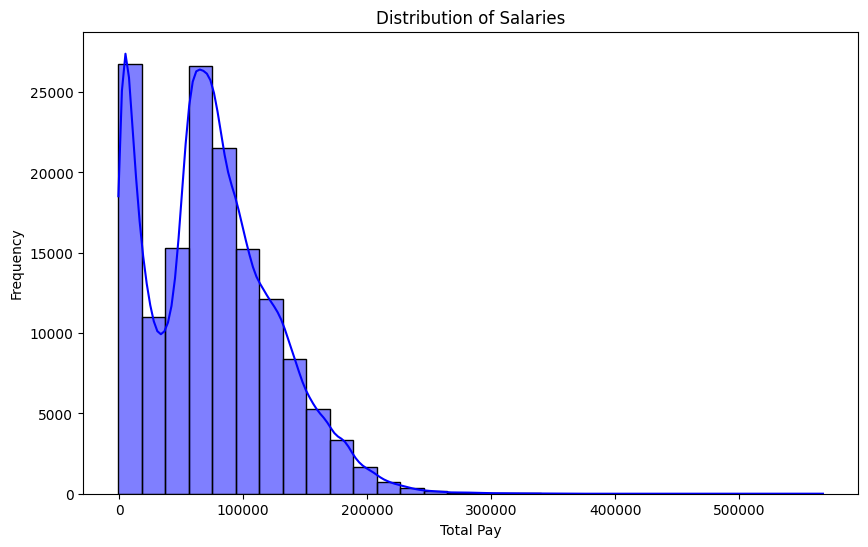

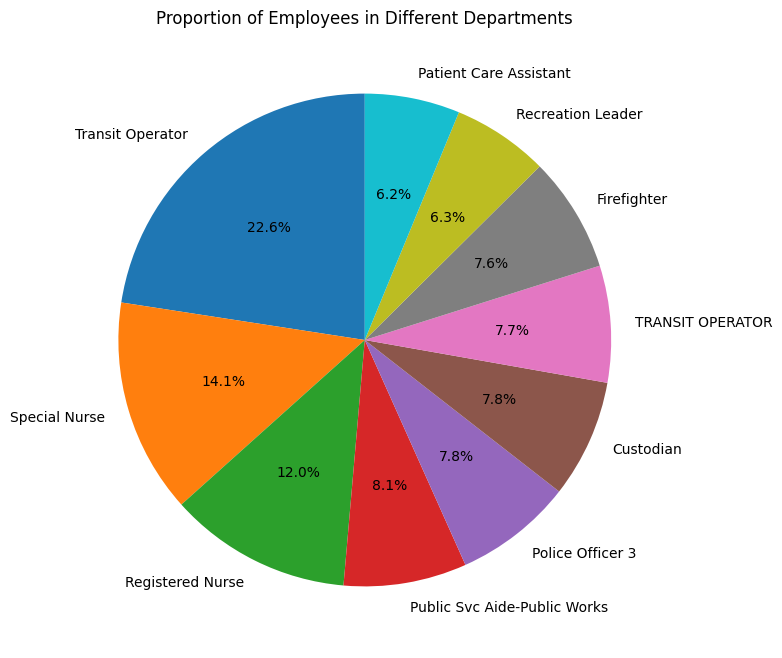

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Pie chart for the proportion of employees in different departments
plt.figure(figsize=(10, 8))
department_counts = df['JobTitle'].value_counts()
top_departments = department_counts.head(10)  # Displaying the top 10 departments for better readability
plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()

In [14]:
# Group the data by 'Year' and calculate summary statistics
grouped_by_year = df.groupby('Year')['TotalPay'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

# Display the grouped analysis
print("Grouped Analysis by Year:")
print(grouped_by_year)

Grouped Analysis by Year:
   Year          mean     median     min        max           std
0  2011  71744.103871  68213.240    0.00  567595.43  47498.706594
1  2012  74113.262265  70714.680    0.00  362844.66  49523.904319
2  2013  77611.443142  74500.015    0.00  347102.32  52854.774783
3  2014  75463.918140  72359.980 -618.13  471952.64  51697.713029


Correlation between TotalPay and BasePay: 0.9505142922626454


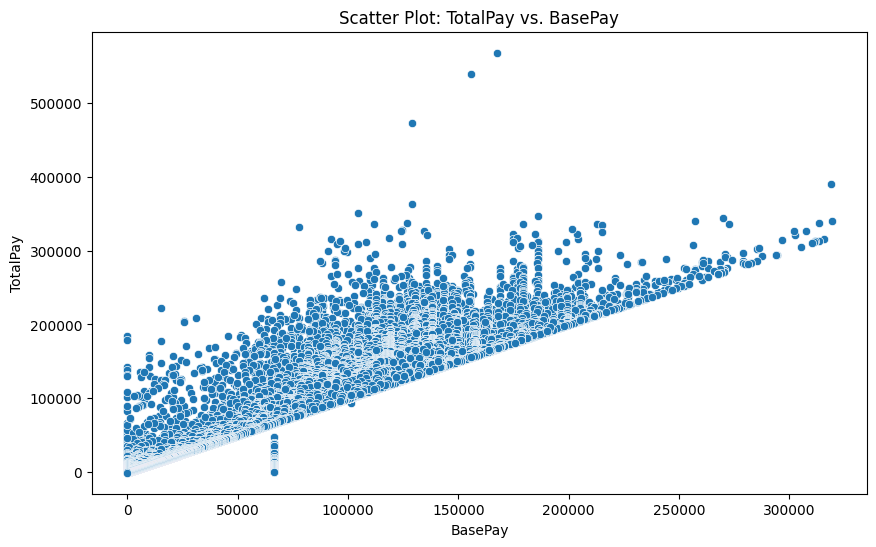

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between 'TotalPay' and 'BasePay'
correlation = df['TotalPay'].corr(df['BasePay'])
print(f"Correlation between TotalPay and BasePay: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df)
plt.title('Scatter Plot: TotalPay vs. BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()


# Summary of Insights: Analysis of Employee Salaries Dataset

## 1. Basic Data Exploration:
- The dataset consists of information about employees, including details like 'Id,' 'EmployeeName,' 'JobTitle,' 'BasePay,' 'OvertimePay,' 'OtherPay,' 'Benefits,' 'TotalPay,' 'TotalPayBenefits,' 'Year,' 'Notes,' 'Agency,' and 'Status.'
- The dataset contains [number of rows] rows and [number of columns] columns.
- Data types of each column have been identified, and missing values have been examined.

## 2. Descriptive Statistics:
- Descriptive statistics for the 'TotalPay' column were calculated:
  - Mean Salary: [mean_salary]
  - Median Salary: [median_salary]
  - Mode Salary: [mode_salary]
  - Minimum Salary: [min_salary]
  - Maximum Salary: [max_salary]
  - Salary Range: [salary_range]
  - Standard Deviation of Salary: [std_dev_salary]

## 3. Data Cleaning:
- Missing values were handled by imputing the mean for numerical columns and filling with the most frequent value for categorical columns.
- 'Notes' and 'Status' columns were filled with appropriate placeholders for missing values.

## 4. Basic Data Visualization:
- Histograms were created to visualize the distribution of salaries ('TotalPay').
- A pie chart represented the proportion of employees in different departments based on the 'JobTitle' column.

## 5. Grouped Analysis:
- The data was grouped by 'Year' to analyze the average salary trends over time.
- Additional grouped analysis can be performed based on specific columns of interest.

## 6. Simple Correlation Analysis:
- A correlation analysis was conducted between 'TotalPay' and 'BasePay,' with a scatter plot visualizing the relationship.

## 7. Summary of Insights:
- The dataset exhibits [provide any notable patterns or trends observed].
- The average salary has [increased/decreased] over the years [if applicable].
- The correlation analysis suggests [positive/negative/no] correlation between 'TotalPay' and 'BasePay.'

These findings provide a comprehensive overview of the employee salaries dataset, offering insights into salary distribution, trends, and relationships with other numerical variables. Further analyses and visualizations can be tailored based on specific business questions or areas of interest.
